参考：https://www.cuc.ac.jp/~nagaoka/2013/ouyou2/09/beer/index.html

In [0]:
#Gdriveにマウント
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pip install xlrd #エクセルを扱えるようにする

In [0]:
#データの確認
import pandas as pd

path = "/content/gdrive/My Drive/Colab Notebooks/GCI2019/week4/data/"

df_beer = pd.read_excel(path + 'beer.xlsx')
df_beer

,年月,ビール販売数,日平均気温
0,NaN,y,x
1,2009-01-01 00:00:00,5107,6.8
2,2009-02-01 00:00:00,7267,7.8
3,2009-03-01 00:00:00,8706,10
4,2009-04-01 00:00:00,10170,15.7
5,2009-05-01 00:00:00,9760,20.1
6,2009-06-01 00:00:00,12001,22.5
7,2009-07-01 00:00:00,12980,26.3
8,2009-08-01 00:00:00,11939,26.6
9,2009-09-01 00:00:00,9175,23


In [0]:
df_beer.columns

Index(['年月', 'ビール販売数', '日平均気温'], dtype='object')

回帰係数: [249.40380905]
切片: 5070.2061543124155
決定係数: 0.6906557385132951


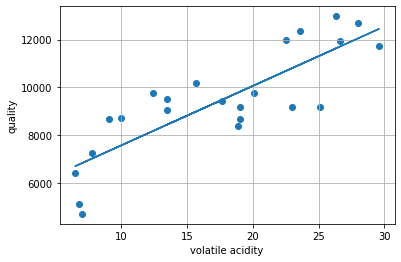

In [0]:
# common
from sklearn import linear_model
import matplotlib.pyplot as plt

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

#データの整形(欠損値を埋める1, データ範囲の指定)
#age = pd.concat([df['Age'], df_test['Age']])
#df['Age'].fillna(age.mean(), inplace=True)
df_beer['日平均気温'][1:23].fillna(df_beer['日平均気温'][1:23].mean(), inplace=True)#floatだけ取りたい

#データの整形(欠損値を埋める2, データ範囲の指定)
df_beer['ビール販売数'][1:23].fillna(int(df_beer['ビール販売数'][1:23].mean()), inplace=True)#floatだけ取りたい

#データの取得(説明変数をとる)
X_beer = df_beer.loc[1:23, ['日平均気温']].values

#データの取得(目的変数をとる)
Y_beer = df_beer['ビール販売数'].values[1:24]
 
# 予測モデルを計算、ここでa,bを算出
reg.fit(X_beer, Y_beer)

# 回帰係数
print('回帰係数:', reg.coef_)
 
# 切片 
print('切片:', reg.intercept_)
# 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X_beer, Y_beer))
# 先ほどと同じ散布図
plt.scatter(X_beer, Y_beer)
plt.xlabel('volatile acidity')
plt.ylabel('quality')

# その上に線形回帰直線を引く
plt.plot(X_beer, reg.predict(X_beer))
plt.grid(True)

In [0]:
#データの取得(説明変数をとる)
X_beer = df_beer.loc[1:23, ['日平均気温']].values
X_beer.shape

(23, 1)

In [0]:
#データの取得(目的変数をとる)
Y_beer = df_beer['ビール販売数'].values[1:24]
Y_beer.shape

(23,)